In [29]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
import os
import pandas as pd

run_paths = [
    "../mlruns/917067206222057822/0b5c59163be8432ab22a58ff2fc90514/metrics/",
    "../mlruns/917067206222057822/ad8ee6de54ef452bb0cf68bd561f53ab/metrics/", 
    "../mlruns/892692420096890154/d14289e66d634cb9a4644cebe26c8432/metrics/",
    "../mlruns/892692420096890154/f3d1d142e0ed4e30a6a2a55d277b8284/metrics/",
    "../mlruns/588588928569911459/ff361c53a8a44201aecc485ad21b19fb/metrics/"
]

df_list = []  # List to store DataFrames from each run

for run_path in run_paths:
    data = {"epoch": []}  # Dictionary to store extracted data
    
    for file_name, col_name in [("avg_train_loss", "avg_train_loss"), ("avg_val_loss", "avg_val_loss")]:
        file_path = os.path.join(run_path, file_name)

        if os.path.exists(file_path):
            with open(file_path, "r") as file:
                lines = file.readlines()

                # Extract epoch and loss values
                epochs, losses = [], []
                for line in lines:
                    parts = line.strip().split()  # Split by whitespace
                    if len(parts) == 3:
                        _, loss, epoch = parts
                        epochs.append(int(epoch))
                        losses.append(float(loss))
                
                data[col_name] = losses
                data["epoch"] = epochs

        else:
            print(f"File {file_name} not found in {run_path}")

    # Convert dictionary to DataFrame
    df_run = pd.DataFrame(data)

    # Add a column to indicate which run this data is from
    df_run["run"] = os.path.basename(os.path.dirname(run_path))  # Use run ID as identifier

    # Append the DataFrame to the list
    df_list.append(df_run)

# Concatenate all runs into a single DataFrame
df = pd.concat(df_list, ignore_index=True)

# ✅ Sort by epoch
df = df.sort_values(by="epoch").reset_index(drop=True)

print(df)



    

     epoch  avg_train_loss  avg_val_loss      run
0        1        3.011916      2.755498  metrics
1        2        2.391381      2.333287  metrics
2        3        1.830894      2.077356  metrics
3        4        1.438089      1.888886  metrics
4        5        1.161986      1.760543  metrics
..     ...             ...           ...      ...
195    196        0.010555      0.480756  metrics
196    197        0.010139      0.475674  metrics
197    198        0.011187      0.451008  metrics
198    199        0.009747      0.495073  metrics
199    200        0.009702      0.489701  metrics

[200 rows x 4 columns]


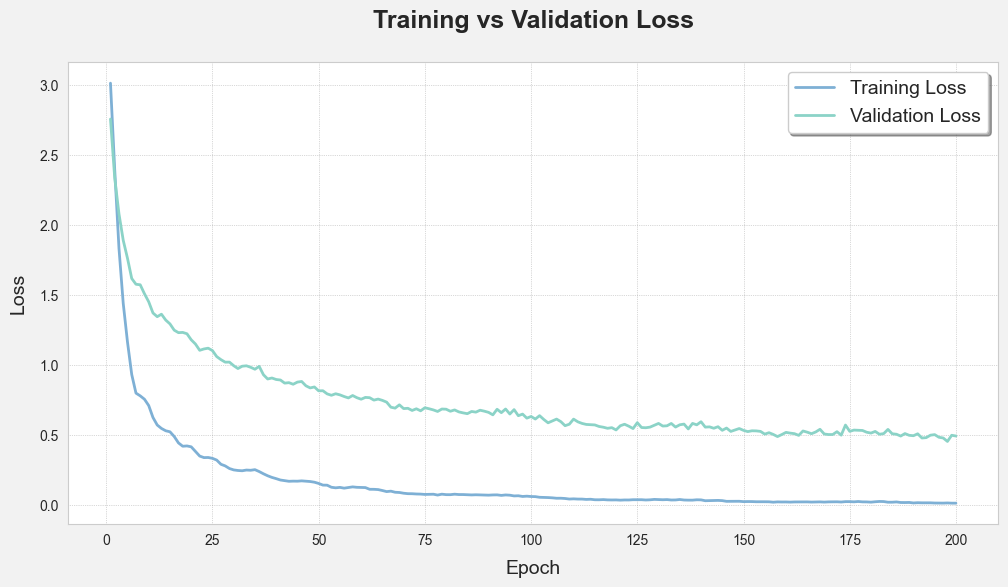

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style with a beige background
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6), facecolor="#f2f2f2")  # Soft beige background

# Choose a beautiful font# Use a classic serif font
plt.rcParams["font.size"] = 10       # Slightly larger font

plt.plot(df["epoch"], df["avg_train_loss"], label="Training Loss", 
         color="#7eb0d5", linewidth=2, alpha=1.0)
plt.plot(df["epoch"], df["avg_val_loss"], label="Validation Loss", 
         color="#8bd3c7", linewidth=2,  alpha=1.0)

plt.xlabel("Epoch", fontsize=14, labelpad=8)
plt.ylabel("Loss", fontsize=14,labelpad=8)
plt.title("Training vs Validation Loss", fontsize=18, pad=25)

plt.grid(color="gray", linestyle="dotted", linewidth=0.5, alpha=0.6)

plt.legend(fontsize=14, loc="upper right", frameon=True, shadow=True, facecolor="white")


plt.show()


